In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
import pymc3 as pm

## Generate toy dataset

In [3]:
np.random.seed(314)
N=100
alpha_true = 2.5
beta_true = 0.9
eps_true = np.random.normal(0,0.5, size=N)

x = np.random.normal(10,1,N)
y_true = alpha_true + beta_true * x 
y = y_true + eps_true

Text(0.5, 0, 'y')

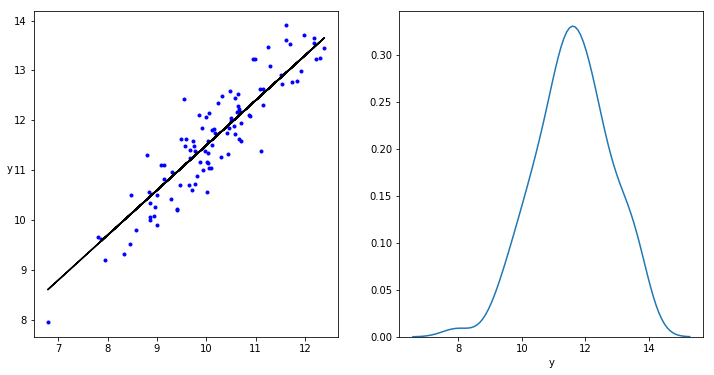

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].plot(x, y, '.b')
ax[0].plot(x, y_true, '-k')
ax[0].set_ylabel('y', rotation=0)
ax[1].set_xlabel('x')
sns.kdeplot(y)
ax[1].set_xlabel('y')

In [21]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = pm.Deterministic('mu', alpha + beta * x)
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step, start)
    

/home/majeed/leraning/env3.6/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -71.578, ||grad|| = 0.14936: 100%|██████████| 36/36 [00:00<00:00, 962.22it/s]         
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:09<00:00, 4354.87draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1456bfd68>,
      dtype=object)

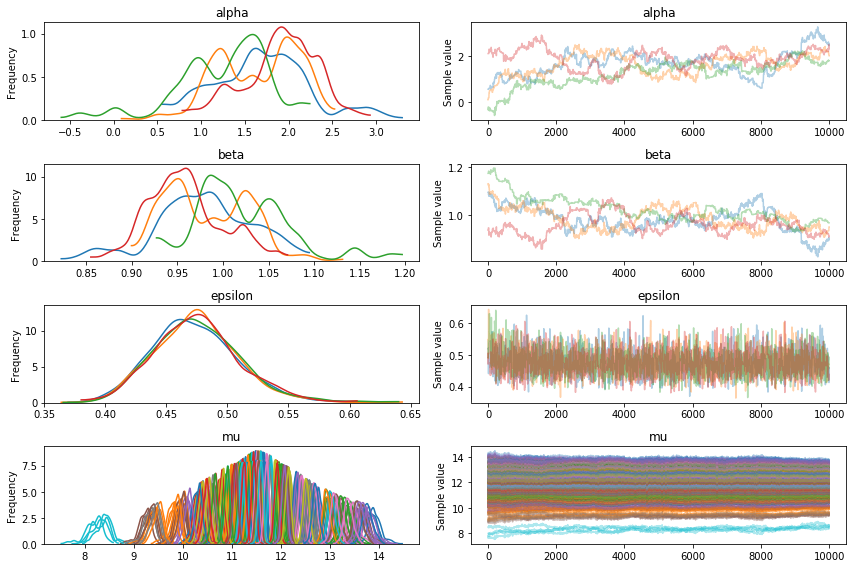

In [22]:
pm.traceplot(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb13b481278>,
      dtype=object)

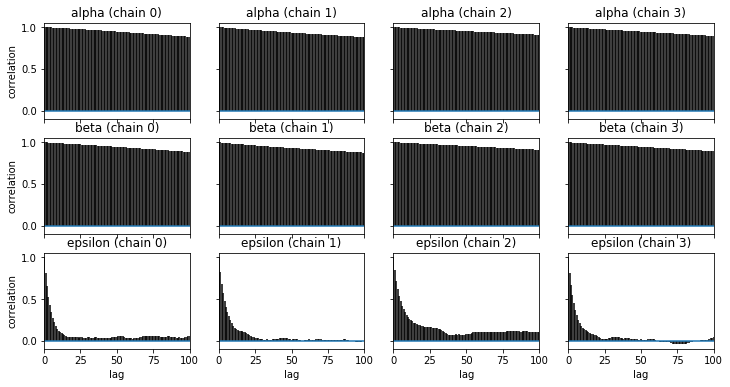

In [23]:
varnames = ['alpha', 'beta', 'epsilon']
pm.autocorrplot(trace, varnames)

Text(0, 0.5, '$\\beta$')

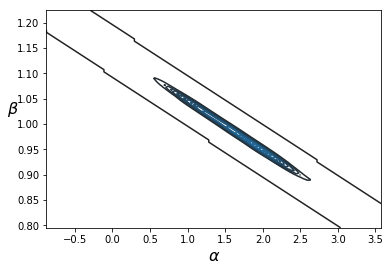

In [24]:
sns.kdeplot(trace['alpha'], trace['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)